# ADM - HW2 - Instagram Profiles & Posts

## Libraries & Setup

In [ ]:
import pandas as pd   # Data manipulation and analysis

from collections import Counter   # For keeping count

import warnings
warnings.filterwarnings('ignore')

import functions

In [ ]:
profiles_df = pd.read_csv(r'D:\Data\instagram_profiles.csv', delimiter='\t', converters={"profile_id": str})
locations_df = pd.read_csv(r'D:\Data\instagram_locations.csv', delimiter='\t', converters={"id": str})

In [ ]:
posts_reader = functions.initialize_posts_reader()

# Research questions

## [RQ1] *Exploratory Data Analysis*

Define the main characteristics with visual and tabular methods.

In [ ]:
functions.EDA(functions.read_csv(None, 'instagram_profiles.csv', 6))

Read 4509586 rows and columns from instagram_profiles.csv!
The dimensions of the dataset:  (4509586, 11)
The names of the columns:  sid, profile_id, profile_name, firstname_lastname, description, following, followers, n_posts, url, cts, is_business_account
Columns with missing values and their percentage of missing data: 
profile_id              0.719512
firstname_lastname      6.396707
description            45.591680
following              23.434856
followers              23.434856
n_posts                23.434856
url                    80.701687
cts                     9.723465
is_business_account    23.600016

Possible categorical values in the data:  is_business_account    2

Number of duplicates in the data:  0

          following     followers       n_posts
count  3.452771e+06  3.452771e+06  3.452771e+06
mean   1.405641e+03  4.739899e+03  4.095414e+02
std    8.113473e+03  1.939087e+05  1.041940e+03
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    3.560000e+02  1.590000e+0

There is a  missing data.

The following variables, subscribers and number of posts have a minimum value of 0, there are only positive values. The mean is greater than the median for all variables, indicating that the distribution may be skewed to the right.

### the posts dataset

In [ ]:
functions.EDA_for_posts()

The dataset has 42710197 rows and 10 columns.
The names of the columns are: sid, sid_profile, post_id, profile_id, location_id, cts, post_type, description, numbr_likes, number_comments
Columns with missing values and their percentage of missing data: 
profile_id           6.04842
location_id        30.373946
cts                 0.007801
description         9.354693
numbr_likes         0.000084
number_comments     0.000084

Possible categorical values in the data:  post_type    3

Descriptive statistics: 
                 min        max        mean          std
numbr_likes      0.0  8822952.0  283.503046  6124.611228
number_comments  0.0   488953.0    7.595308    194.14764


The posts dataset consists of  10 columns and contains missing values.There is also a large gap between the 75th percentile and the maximum number of comments. This indicates that there are some outliers in the data set.

### the locations dataset

In [ ]:
functions.EDA(functions.read_csv(None, 'instagram_locations.csv', 2))

Read 1022658 rows and columns from instagram_locations.csv!
The dimensions of the dataset:  (1022658, 23)
The names of the columns:  sid, id, name, street, zip, city, region, cd, phone, aj_exact_city_match, aj_exact_country_match, blurb, dir_city_id, dir_city_name, dir_city_slug, dir_country_id, dir_country_name, lat, lng, primary_alias_on_fb, slug, website, cts
Columns with missing values and their percentage of missing data: 
street                    30.015313
zip                       30.027536
city                       8.359784
region                    99.827899
cd                         8.179470
phone                     41.164299
aj_exact_city_match        2.165729
aj_exact_country_match     2.165729
blurb                     60.230595
dir_city_id               51.528468
dir_city_name             51.528468
dir_city_slug             51.575111
dir_country_id            51.535313
dir_country_name          51.528468
lat                        0.602645
lng                        0

The dataset locations consists of 23 columns and 20 of them have missing values. Most of them arent necessary. 

### Numerical variable distributions
> Блок с отступами



Read 42710197 rows and columns from instagram_posts.csv!
Read 4509586 rows and columns from instagram_profiles.csv!
Standard scale histograms up till 95th percentile


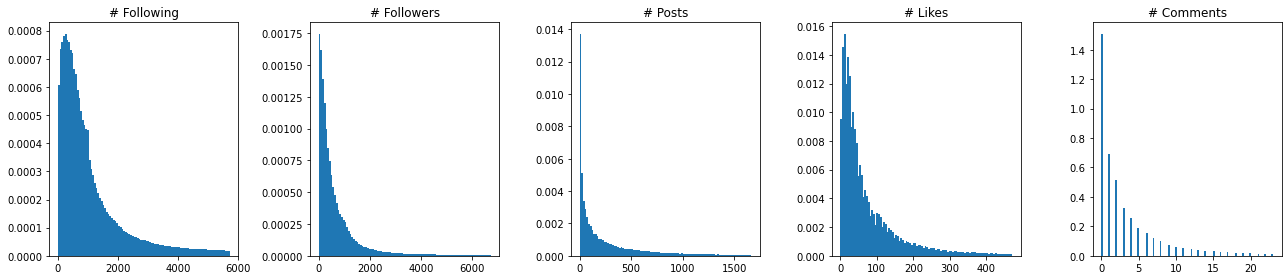

Log scale histograms up till 95th percentile


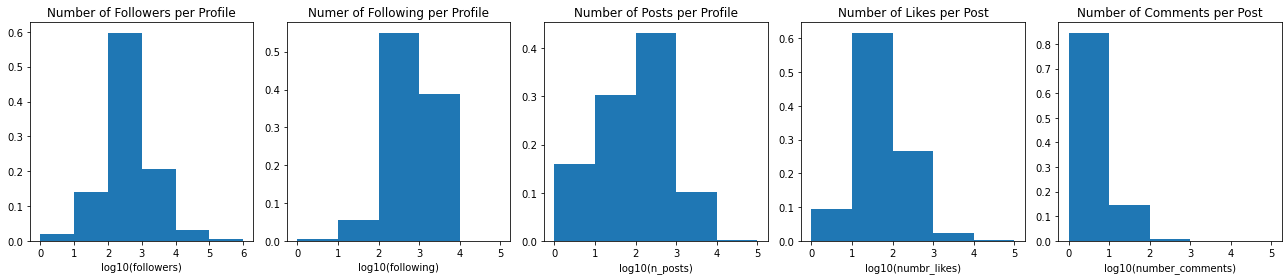

In [ ]:
functions.plot_hists_eda()

the distributions are skewed to the right. This is indicative of the nature of the platform we are investigating. On Instagram, the vast majority of users have a small number of the above indicators. 
The logarithmic bar graphs show what percentage of users belong to one group or another. More than 50% of users have between 100 and 1000 followers and more than 60% of users follow 100-1000 accounts.

## [RQ3] 

In [ ]:
posts_reader = functions.initialize_posts_reader()

In [ ]:
posts_time = functions.retrieve_posts_time(posts_reader)

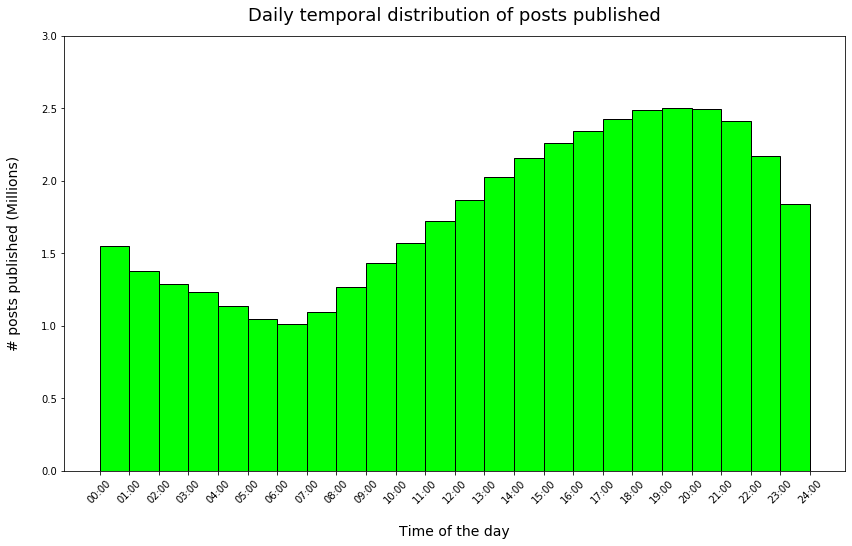

In [ ]:
functions.plot_posts_time(posts_time)

In [ ]:
time_intervals = [(6,11), (11,14), (14,17), (17,20), (20,24), (0,3), (3,6)]

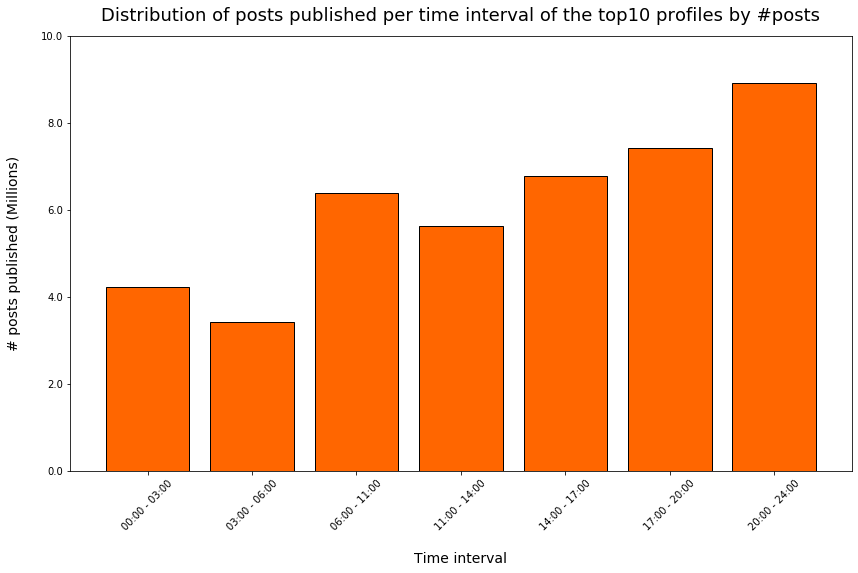

In [ ]:
functions.plot_posts_time_custom(posts_time, time_intervals)

## [RQ4] 

In [ ]:
posts_reader = functions.initialize_posts_reader()

In [ ]:
profile_posts_map = functions.build_profile_posts_map(posts_reader)
posts = functions.posts_by_top_profile_ids(profile_posts_map,
                                           profiles_df[profiles_df["profile_id"]!=""].dropna(subset=["profile_id"]), 10)

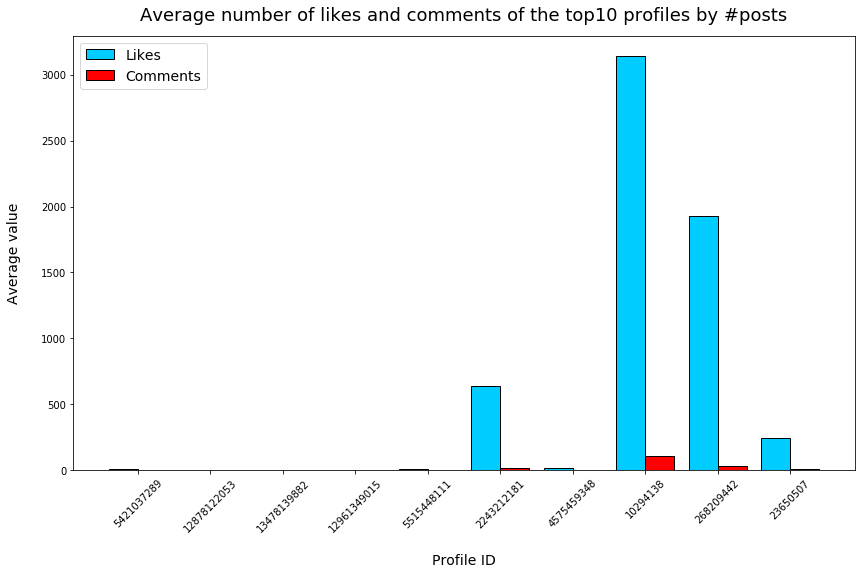

In [ ]:
functions.plot_avg_stats_top10(posts)

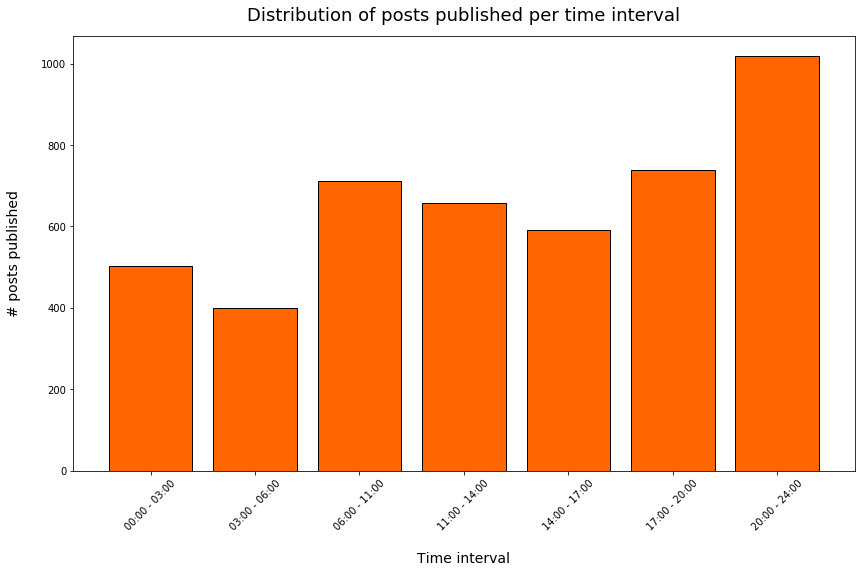

In [ ]:
functions.plot_posts_top10(posts, time_intervals)

## [RQ7]

Read 42710197 rows and columns from instagram_posts.csv!
Read 4509586 rows and columns from instagram_profiles.csv!


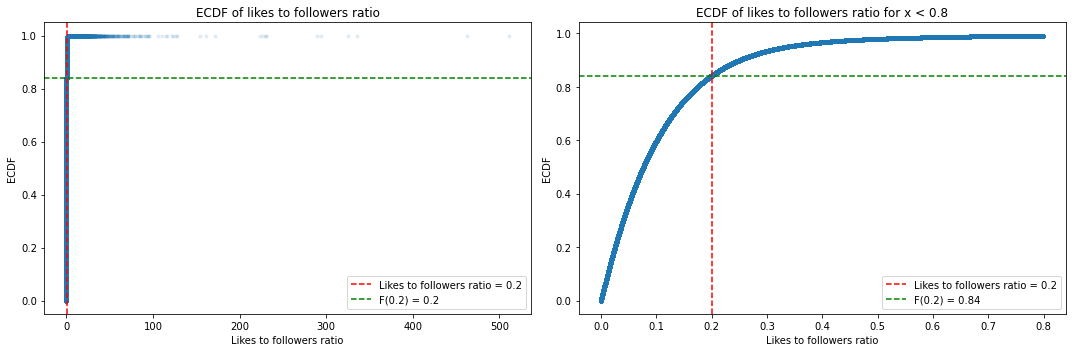

15.72% of the posts have a likes to followers ratio greater than 0.2.


In [ ]:
functions.likes_to_follower()

### Do users return to locations?


Read 42710197 rows and columns from instagram_posts.csv!
Percentage of profiles that visited the first location later than 24 hours: 33.58%


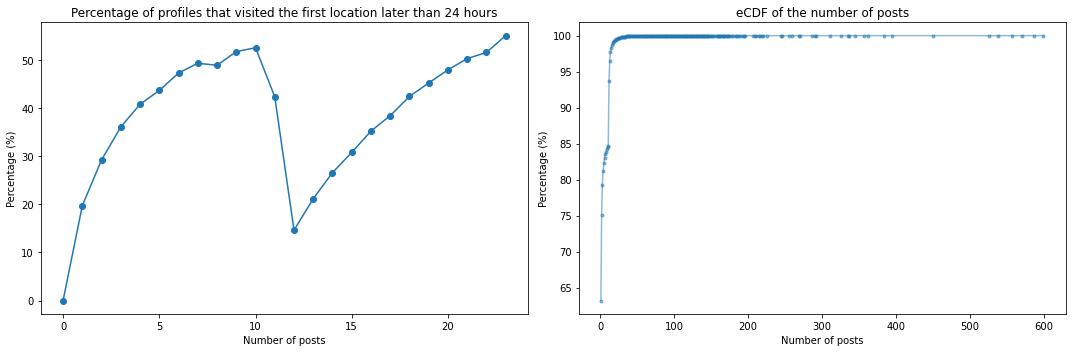

In [ ]:
functions.return_to_locs()

### Interpreting our results

I does depends on the types of users

## [RQ8] 

### Does more "likes" also mean more comments?
Drop-down values are removed by removing rows where the values do not fall within the 3 standard deviation range of the mean value.

Read 42710197 rows and columns from instagram_posts.csv!


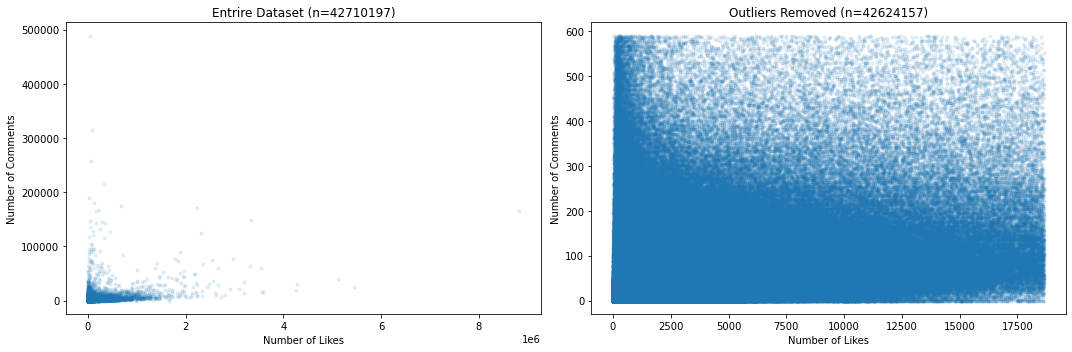

In [ ]:
functions.scatter_likes_comments()

From the scatter plots above, we somewhat see a positive relationship between the two variables. However the visual intrepetation is relatively hard in this case since the variables are by design strictly positive and most of them are clustered in the left lower corner, thus we will further support our insticts by statistical methods in the section below.

### Testing the relationship between likes and comments

The first regression is a level regression, and the second is a logistic regression.

There is no statistical tests to compare models since they are not nested. Moving on we will use the log-log model, since it has a better (lower) BIC score, thus reflects the reality more acurately.

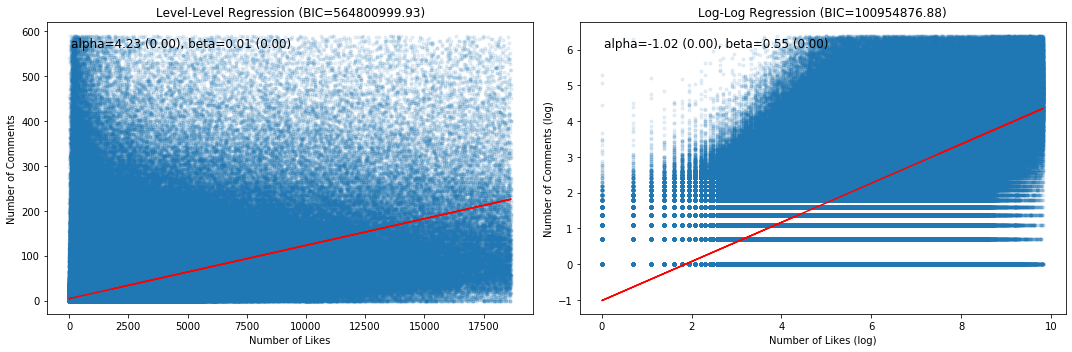

In [ ]:
functions.testing_likes_comments()

there is a significant correlation between the number of likes and the number of comments. In the graph above ther are indicated p-values that are less than 0.05.
This is the basic assumption of the t-test.


### What's the distribution of followers? 
 the empirical distribution 

Read 4509586 rows and columns from instagram_profiles.csv!


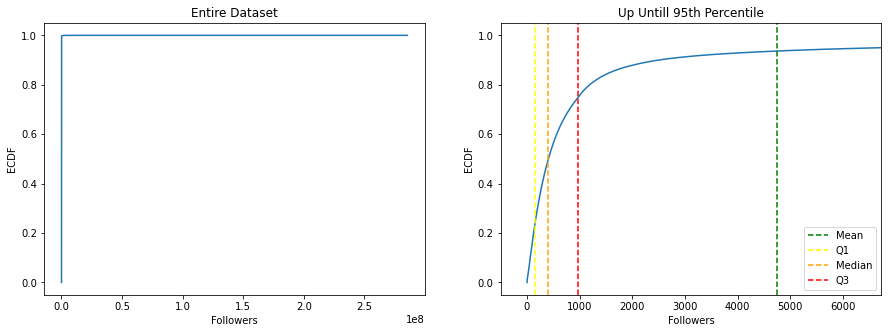

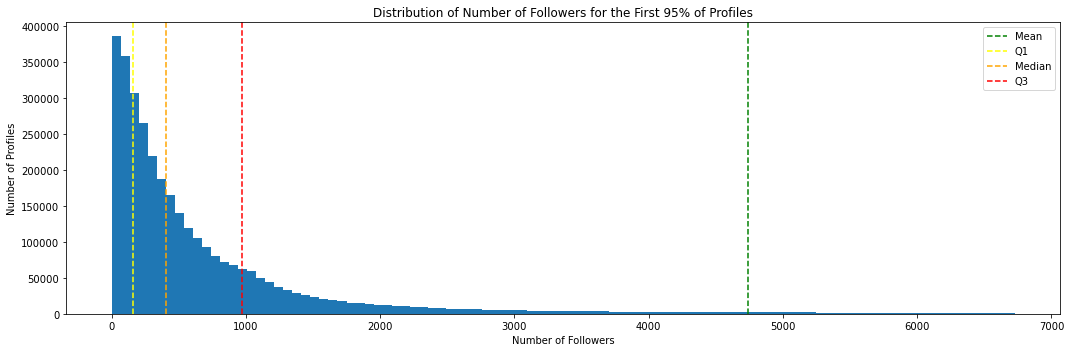

In [ ]:
functions.followers_distrubution()

#### Intrpeting the plots
the mean is much higher than the median, even compared to Q3. This means that the data are skewed to the right. In addition, there are extreme values which do not allow all data to be plotted on a linear scale. Extreme values pull the mean value to the right.

### What are histograms, bar plots, scatterplots and pie charts used for?

* The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.
* It allows  to compare different sets of data among different groups easily. It instantly demonstrates this relationship using two axes, where the categories are on one axis and the various values are on the other. A bar graph can also illustrate important changes in data throughout a period of time.
* Scatter plots' primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole. Identification of correlational relationships are common with scatter plots.
* A pie chart categorizes various data into segments. Bar charts display them horizontally or vertically. To make pie charts, you must determine the relative value or the measured values. Bar charts show the absolute values; however, they do not require any measurements.

### What insights can you extract from a Box Plot?

Box plots provide a quick visual summary of the variability of values in a dataset. They show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset. Outliers can reveal mistakes or unusual occurrences in data.

Read 4509586 rows and columns from instagram_profiles.csv!


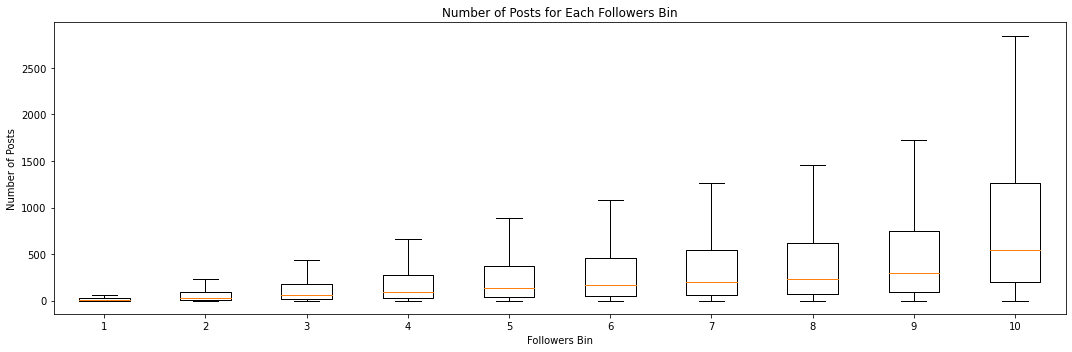

In [ ]:
functions.boxplots()

People with more subscribers tend to post more. Meanwhile, the median stays relatively constant up to group 9, so the average user posts with the same frequency up to group 9.